Inplementation of B-FRET library for our data
=============================================

[Article](https://doi.org/10.1073/pnas.2211807120), [github](https://github.com/emonetlab/B-FRET/tree/main)

In [1]:
import numpy as np
from numpy import ma
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from skimage import io

from domb.red_green import wt_vs_mut_multistim
from domb.utils import plot
from domb.utils.plot import CMaps
from domb.utils import masking

# Input data & parameters

In [2]:
img_DD = io.imread('/home/wisstock/bio_data/chemLTD/24_05_16/processing/09/24_05_16_09_xform_ch0.tif')
img_DA = io.imread('/home/wisstock/bio_data/chemLTD/24_05_16/processing/09/24_05_16_09_xform_ch1.tif')
img_AA = io.imread('/home/wisstock/bio_data/chemLTD/24_05_16/processing/09/24_05_16_09_xform_ch3.tif')
mask_FRET = io.imread('/home/wisstock/bio_data/chemLTD/24_05_16/processing/09/24_05_16_09_FRET_up-labels.tif')

a = 0.122
d = 0.794
G = 4.11

# Data chekout and profiles extracting

In [4]:
def label_prof(input_label: np.ndarray, input_img_series: np.ndarray):
    prof_I_arr = []
    prof_SD_arr=[]
    for label_num in np.unique(input_label)[1:]:
        region_mask = input_label == label_num
        prof_I = np.mean(input_img_series, axis=(1,2), where=region_mask)
        prof_SD = np.std(input_img_series, axis=(1,2), where=region_mask)

        prof_I_arr.append(prof_I)
        prof_SD_arr.append(prof_SD)
    
    return np.asarray(prof_I_arr), np.asarray(prof_SD_arr)

profiles_I_DD, profiles_SD_DD = label_prof(mask_FRET, img_DD)
profiles_I_DA, profiles_SD_DA = label_prof(mask_FRET, img_DA)
profiles_I_AA, profiles_SD_AA = label_prof(mask_FRET, img_AA)

<ErrorbarContainer object of 3 artists>

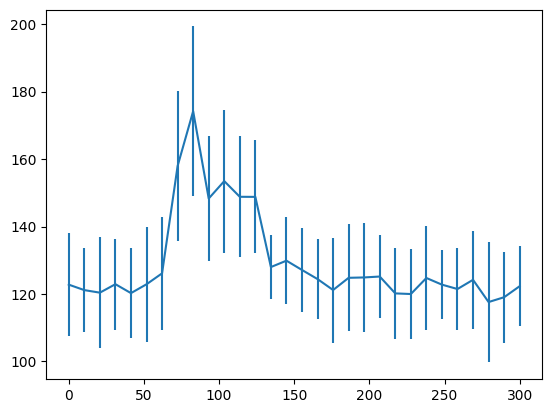

In [5]:
I_selected_ROI = profiles_I_DD[1]
SD_selected_ROI = profiles_SD_DD[1]

time_line = np.linspace(0, I_selected_ROI.shape[0]*10, \
                        num=I_selected_ROI.shape[0])

plt.errorbar(time_line, I_selected_ROI, yerr=SD_selected_ROI)

# Input data formating

In [6]:
import pickle

with open('/home/wisstock/bio/scripts/ltdata/B-FRET/example/data_sinusoids.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [7]:
print(b['IDD'].shape)
print(b['IDD_noise_sd'].shape)
print(b['tDD'].shape)
print(b['data_params'])
print(b['crstlk'])

(2, 1201)
(2, 1201)
(1201,)
{'DT': 8, 'AT': 18, 'CDD': 1360, 'CAA': 340, 'Emax': 0.1, 'tau_D1': 1200, 'tau_D2': 120, 'tau_A1': 3000, 'tau_A2': 300, 'delta': 0.6, 'alpha': 0.6, 'CF': 0.46}
{'d': 0.09, 'a': 0.35, 'G': 0.5}


In [39]:
selected_ROI = 1

input_data = {
    'IDD': profiles_I_DD[[1,2],:],
    'IDA': profiles_I_DA[[1,2],:],
    'IAA': profiles_I_AA[[1,2],:],
    'tDD': time_line,
    'tAA': time_line,
    'IDD_noise_sd': profiles_SD_DD[[1,2],:],
    'IDA_noise_sd': profiles_SD_DA[[1,2],:],
    'IAA_noise_sd': profiles_SD_AA[[1,2],:],
    'crstlk':{'a': a, 'd': d, 'G': G}     
}

print(input_data['IDD'].shape)
print(input_data['IDD_noise_sd'].shape)
print(input_data['tAA'].shape)
print(input_data['crstlk'])

(2, 30)
(2, 30)
(30,)
{'a': 0.122, 'd': 0.794, 'G': 4.11}


In [40]:
with open('B-FRET_test/one_roi.pkl', 'wb') as handle:
    pickle.dump(input_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

# B-FRET

In [30]:
import sys
sys.path.append('./B-FRET/src')
from load_save import load_data
from main import analyze_FRET_data

In [41]:
DATA_DIR = r'./B-FRET_test'
EXP_DIR = r'./B-FRET_test/exp'
	
def run():

	data = load_data(DATA_DIR, 'one_roi')
	a = analyze_FRET_data(data, EXP_DIR)
	a.run()

run()

Optimizing log posterior to get mode for Laplace approx..
372.16448669719347
372.1644868981341
372.1644867082191
372.1644867034992
372.16448670685486
372.1644866971945
372.16448669851167
372.1644867363907
372.164486697194
372.16448712589295
3002.0620055652903
1416.6205693328495
400.88419994364347
371.57373908052966
371.5737382186357
371.57373903468743
371.5737390639908
371.57373905518057
371.5737390805207
371.5737390814404
371.5737391077358
371.57373908053506
371.5737395088591
inf
324.09683362849324
324.0968330202763
324.0968330555862
324.096833611265
324.09683360179537
324.0968336282803
324.0968336027418
324.0968328424388
324.09683362767385
324.0968338777361
inf
472.5792755194236
317.90411009099427
317.9041094248326
317.9041105533346
317.90411007104115
317.90411006001864
317.9041100907066
317.90411006934704
317.9041094651618
317.90411009151046
317.9041102907315
inf
312.051214560137
299.9685652894748
299.9685647182955
299.9685646790879
299.968565267948
299.96856525582524
299.9685652889

/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return f_raw(*args, **kwargs)
/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Running Kalman filter and RTS smoother...


LinAlgError: Singular matrix